## **Market Customer Segmentation with SVM Classifier and K-Means**

IMPORTS

In [3]:
%%capture
!pip install kneed

In [4]:
import pandas as pd
import numpy as np
# Necessary imports
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from matplotlib import pyplot
import plotly.express as px
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing, decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeRegressor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline 


np.set_printoptions(suppress=True)

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(7)

plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=22)   # fontsize of the figure title

**PRE-PROCESSING**

In [6]:
df = pd.read_csv('Train.csv')
df1 = pd.read_csv('Test.csv')
print(f'\nTrain data shape - {df.shape}')
print(f'\nTest data shape - {df1.shape}')

df.head(3)


Train data shape - (8068, 11)

Test data shape - (2627, 10)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [8]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [9]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [10]:
null_df = pd.concat([pd.DataFrame(df.isna().sum()),pd.DataFrame(df1.isna().sum())],axis=1)
null_df.columns = ["Train_Nan","Test_Nan"]
null_df

,Train_Nan,Test_Nan
ID,0,0.0
Gender,0,0.0
Ever_Married,140,50.0
Age,0,0.0
Graduated,78,24.0
Profession,124,38.0
Work_Experience,829,269.0
Spending_Score,0,0.0
Family_Size,335,113.0
Var_1,76,32.0


In [11]:
# How many unique values are in Columns of Data Train ?
listoftrain=[]
print("Total Train Data :",len(df))
for i in df.columns:
  print(f'{i}:',len(df[i].unique()))
  print(f'{i} Nan Values: :',sum(df[i].isna()))
  listoftrain.append(i)
  listoftrain.append(len(df[i].unique()))
  listoftrain.append(sum(df[i].isna()))
  if df[i].dtype=="int64":
    print(f'{i} Mean:',df[i].mean())
    listoftrain.append(df[i].mean())
  else:
    print(f'{i} Mode:',df[i].mode().values[0])
    listoftrain.append(df[i].mode().values[0])

#Train_data_result=pd.DataFrame(np.array(listoftrain).reshape((10,4)),columns=["Feature","Unique","NanValues","Mode"])

Total Train Data : 8068
ID: 8068
ID Nan Values: : 0
ID Mean: 463479.21455131384
Gender: 2
Gender Nan Values: : 0
Gender Mode: Male
Ever_Married: 3
Ever_Married Nan Values: : 140
Ever_Married Mode: Yes
Age: 67
Age Nan Values: : 0
Age Mean: 43.46690629647992
Graduated: 3
Graduated Nan Values: : 78
Graduated Mode: Yes
Profession: 10
Profession Nan Values: : 124
Profession Mode: Artist
Work_Experience: 16
Work_Experience Nan Values: : 829
Work_Experience Mode: 1.0
Spending_Score: 3
Spending_Score Nan Values: : 0
Spending_Score Mode: Low
Family_Size: 10
Family_Size Nan Values: : 335
Family_Size Mode: 2.0
Var_1: 8
Var_1 Nan Values: : 76
Var_1 Mode: Cat_6
Segmentation: 4
Segmentation Nan Values: : 0
Segmentation Mode: D


In [12]:
#Removing the Nans using KNN
df_train = df.copy()
df_test = df1.copy()
def get_encoded_dict(df,lst):
    """
    this function creates dictionary for encoding. Its find unique labels for each column and enumerate them
    
    Arguments:
    df -- pandas dataframe
    lst -- list of columns which we want to encode 
    
    Returns:
    dictionary where key is column name and value is dictionary of unique labels and encoding value
    """
    encoded_dict = {}
    for col in lst:
        each_dict = {}
        sorted_unique_names = df[col].dropna().unique()
        sorted_unique_names.sort()
        for i,val in enumerate(sorted_unique_names):
            each_dict[val] = i
        encoded_dict[col] = each_dict
    return encoded_dict


In [13]:
encoded_dict = get_encoded_dict(df_train,["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1","Segmentation"])
duplicates = df_train[df_train.duplicated(subset = df_train.columns.drop("Segmentation"))]
duplicates = duplicates.replace(encoded_dict)
df_train = df_train.replace(encoded_dict)
df_test = df_test.replace(encoded_dict)

In [14]:
imputer = KNNImputer()
df_train[df_train.columns.drop(["ID","Segmentation"])] = np.round(imputer.fit_transform(df_train.drop(columns = ["ID","Segmentation"])))

In [15]:
df_test[df_test.columns.drop(["ID"])] = np.round(imputer.fit_transform(df_test.drop(columns = ["ID"])))

In [16]:
null_df = pd.concat([pd.DataFrame(df_train.isna().sum()),pd.DataFrame(df_test.isna().sum())],axis=1)
null_df.columns = ["Train_Nan","Test_Nan"]
null_df

,Train_Nan,Test_Nan
ID,0,0.0
Gender,0,0.0
Ever_Married,0,0.0
Age,0,0.0
Graduated,0,0.0
Profession,0,0.0
Work_Experience,0,0.0
Spending_Score,0,0.0
Family_Size,0,0.0
Var_1,0,0.0


In [17]:
for i in df.columns:
  if sum(df[i].isna())!=0:
    df[i+"_add_val"] = df[i].isna()
  if i!= ["Age","Work_Experience","Family_Size"]:
    df[i]=df[i].fillna(df[i].mode().values[0])
  else:
    df[i]=df[i].fillna(df[i].mean())

EXPLORATORY DATA ANALYSIS

In [18]:
plot_data = df.groupby('Segmentation')['Segmentation'].agg(['count']).reset_index()
fig = px.pie(plot_data, values = plot_data['count'], names = plot_data['Segmentation'])
fig.update_traces(textposition = 'inside', textinfo = 'percent + label', hole = 0.5, 
                  marker = dict(colors = ['	#FF4040','#98F5FF', '	#76EE00', '	#6495ED'], line = dict(color = 'white', width = 2)))
fig.update_layout(title_text = 'Customer<br>Segmentation', title_x = 0.5, title_y = 0.55, title_font_size = 26, 
                  title_font_family = 'Calibri', title_font_color = 'black', showlegend = False)              
fig.show()

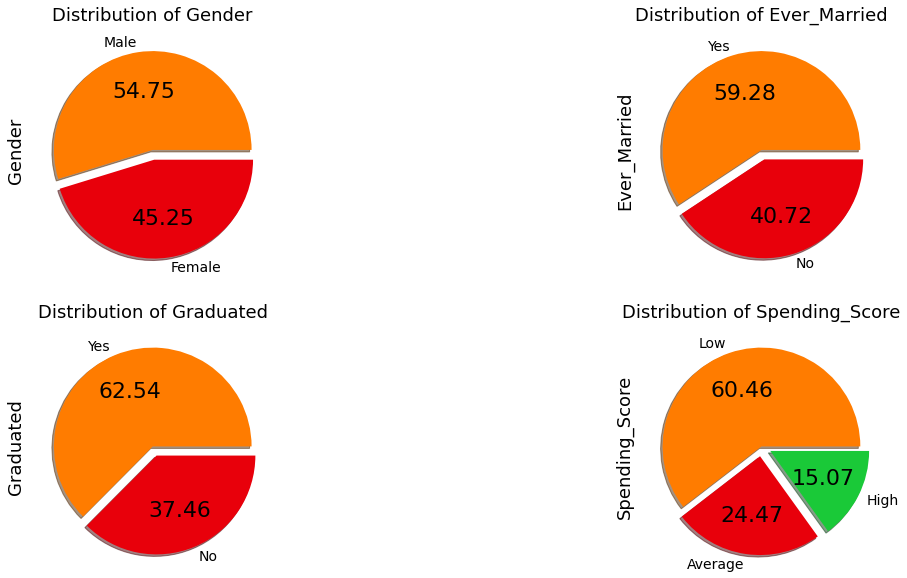

In [19]:
f, ax  = plt.subplots(2,2,figsize = (20,10))
colors=["#FF7C00", "#E8000B","#1AC938"]
df['Gender'].value_counts().plot.pie(title='Distribution of Gender',explode=[0,.1],
                                           ax=ax[0][0],autopct="%.2f",shadow = True,colors = colors)

df['Ever_Married'].value_counts().plot.pie(title='Distribution of Ever_Married',explode=[0,.1],
                                                 ax=ax[0][1],autopct="%.2f",shadow = True,colors = colors)

df['Graduated'].value_counts().plot.pie(title='Distribution of Graduated',explode=[0,.1],
                                              ax=ax[1][0],autopct="%.2f",shadow = True,colors = colors)

df['Spending_Score'].value_counts().plot.pie(title='Distribution of Spending_Score',
                                                   ax=ax[1][1],explode=[0,.1,.1],autopct="%.2f",shadow = True,colors=colors)
f.patch.set_facecolor('white')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

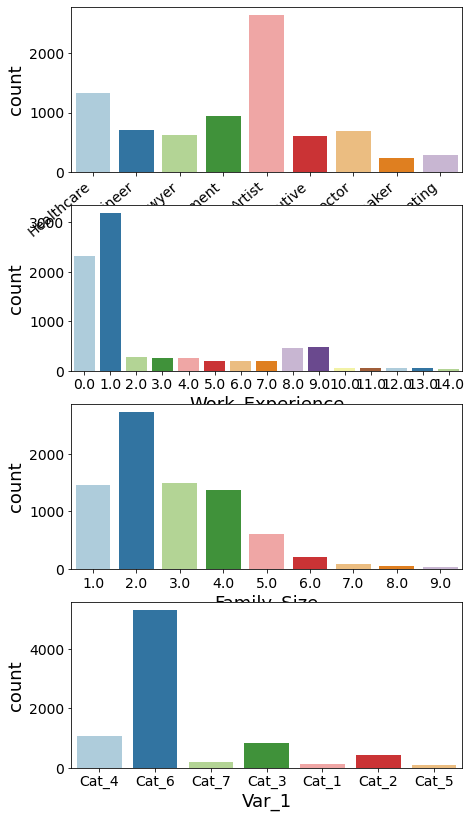

In [20]:
f, ax  = plt.subplots(4,1,figsize = (7,14))
colors=["#023EFF","#FF7C00", "#E8000B","#1AC938"]
labels = ["D","C","A","B"]

ax1 = sns.countplot(df['Profession'],ax=ax[0],palette = "Paired")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

sns.countplot(df['Work_Experience'],ax=ax[1],palette = "Paired")
sns.countplot(df['Family_Size'],ax=ax[2],palette = "Paired")
sns.countplot(df['Var_1'],ax=ax[3],palette = "Paired")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



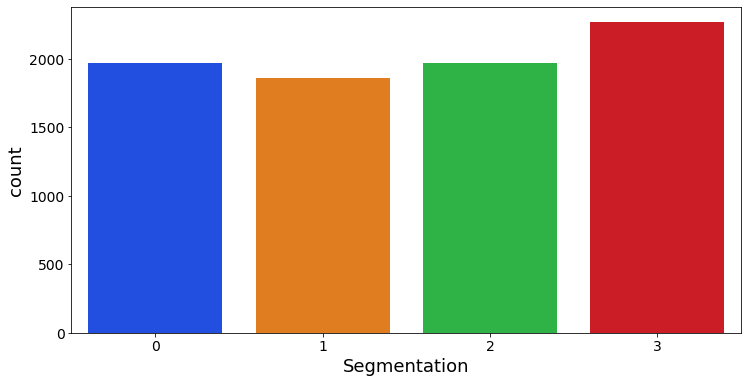

In [21]:
f, ax = plt.subplots(figsize=(12, 6))

sns.countplot(df_train['Segmentation'],palette = "bright")

In [22]:
# Function for plotting different categorcial features affect on target variable (Segmentation)
def plot_pie(feature, df=None):
    data = df
    plot_data = data.groupby([feature, 'Segmentation'])[feature].agg({'count'}).reset_index()

    fig = px.sunburst(plot_data, path = [feature, 'Segmentation'], values = 'count', color = feature, 
                      title = 'Affect of %s on Customer Segmentation'%feature, width = 600, height = 600)

    fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', 
                      title_font_size = 22, title_x = 0.5)

    fig.update_traces(textinfo = 'label + percent parent')
    fig.show()
  
for feature in ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score']:
  plot_pie(feature, df=df)

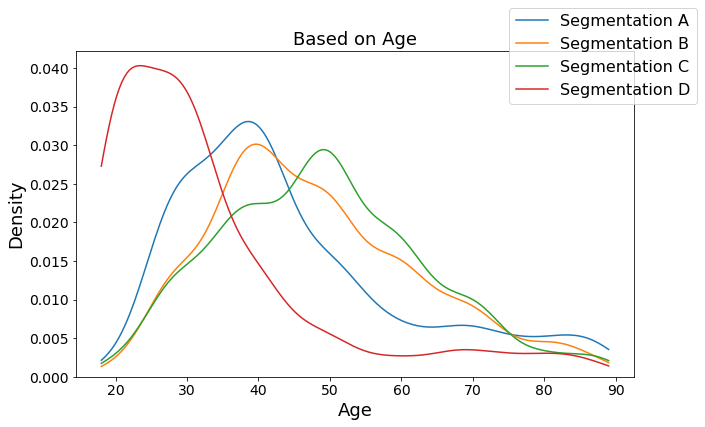

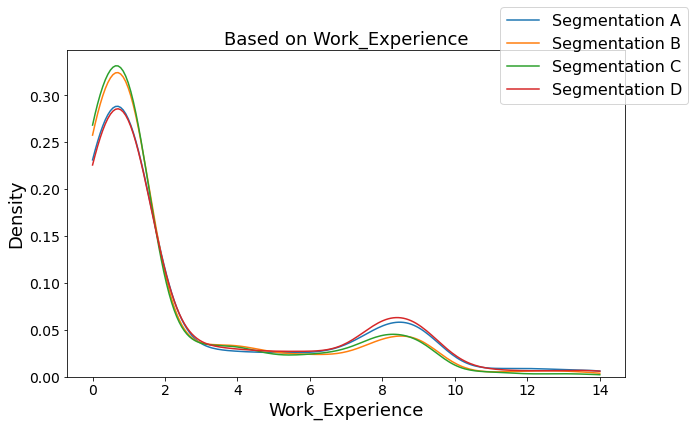

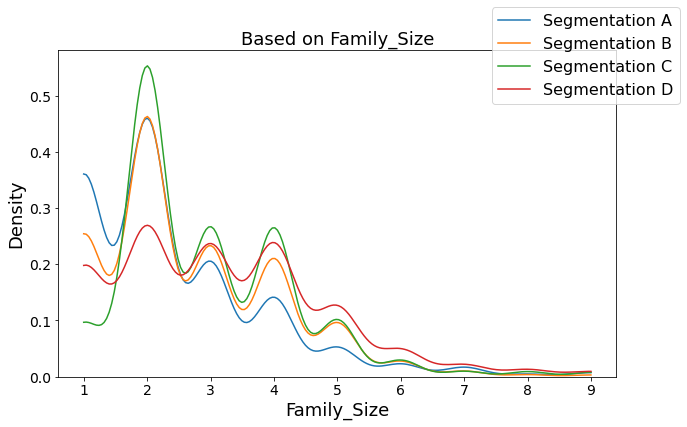

In [23]:
# Functions for plotting different numerical features affect on target variable (Segmentation)
def plot_numerical(feature, figsize=None, df=None):
    data = df
    fig = plt.figure(figsize=(10,6))

    sns.kdeplot(data[data['Segmentation']=='A'][feature], cut = 0)
    sns.kdeplot(data[data['Segmentation']=='B'][feature], cut = 0)
    sns.kdeplot(data[data['Segmentation']=='C'][feature], cut = 0)
    sns.kdeplot(data[data['Segmentation']=='D'][feature], cut = 0)

    fig.legend(labels=['Segmentation A', 'Segmentation B', 'Segmentation C', 'Segmentation D'])
    plt.title('Based on %s'%feature)
    plt.show()

for feature in ['Age', 'Work_Experience', 'Family_Size']:
    plot_numerical(feature, df=df)

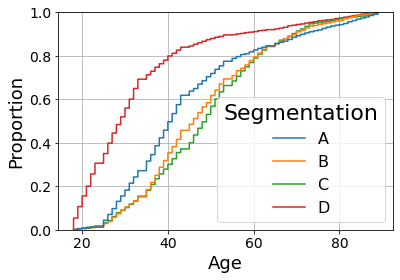

In [24]:
train = df
ecdf_train = train.sort_values(by=['Segmentation'])
sns.ecdfplot(data=ecdf_train , x='Age' , hue= 'Segmentation')
plt.grid()

MODELLING WITH SUPERVISED TECHNIQUES

In [25]:
#Train test split
#Split data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1], df_train.iloc[:, -1], test_size=0.2, random_state=42)

In [26]:
#Scaling the data
scaler = MinMaxScaler()
columns_to_normalize = ['Age','Profession','Work_Experience','Spending_Score','Family_Size','Var_1']

X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
X_test[columns_to_normalize] = scaler.fit_transform(X_test[columns_to_normalize])

df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])
df_test[columns_to_normalize] = scaler.fit_transform(df_test[columns_to_normalize])

X_train.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2821,460591,0.0,1.0,0.281690,1.0,0.125,0.071429,1.0,0.375,0.333333
6192,460459,0.0,0.0,0.211268,0.0,0.250,0.000000,1.0,0.500,0.333333
1393,459043,0.0,1.0,0.436620,0.0,0.250,0.071429,1.0,0.000,1.000000


SUPPORT VECTOR MACHINES (SVM)

In [66]:
df_train_svm_X = df_train.iloc[:, 1:-1]
df_train_svm_y = df_train.iloc[:,-1]

In [67]:
# 10-fold CV
K = 10

# Set up parameters to evaluate using GridSearchCV
C_range = np.logspace(-3, 3, 7)
#C_range = np.array((0.1, 1))
gamma_range = np.logspace(-3, 3, 7)
#gamma_range = np.array((0.1, 1))
param_grid = {'C':C_range, 'kernel':['rbf'], 'gamma':gamma_range}
        

# Specifying that we'll use the Gaussian kernel
svc = SVC()
cv = StratifiedKFold(n_splits=K)
classifier = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv, verbose = 5)
classifier.fit(df_train_svm_X, df_train_svm_y)
kernel_best = classifier.best_params_['kernel']
C_best = classifier.best_params_['C']
gamma_best = classifier.best_params_['gamma']
print(f"Best Kernel: {kernel_best}")
print("Best Regularization Strength 'C': %.3f" % C_best)
print("Best Kernel Width 'gamma': %.3f" % gamma_best)
print("SVM CV Pr(error): %.3f" % (1-classifier.best_score_))

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV 1/10] END .C=0.001, gamma=0.001, kernel=rbf;, score=0.281 total time=   4.9s
[CV 2/10] END .C=0.001, gamma=0.001, kernel=rbf;, score=0.281 total time=   5.0s
[CV 3/10] END .C=0.001, gamma=0.001, kernel=rbf;, score=0.281 total time=   4.8s
[CV 4/10] END .C=0.001, gamma=0.001, kernel=rbf;, score=0.281 total time=   4.8s
[CV 5/10] END .C=0.001, gamma=0.001, kernel=rbf;, score=0.281 total time=   4.8s
[CV 6/10] END .C=0.001, gamma=0.001, kernel=rbf;, score=0.281 total time=   4.8s
[CV 7/10] END .C=0.001, gamma=0.001, kernel=rbf;, score=0.281 total time=   4.8s
[CV 8/10] END .C=0.001, gamma=0.001, kernel=rbf;, score=0.281 total time=   4.8s
[CV 9/10] END .C=0.001, gamma=0.001, kernel=rbf;, score=0.280 total time=   4.8s
[CV 10/10] END C=0.001, gamma=0.001, kernel=rbf;, score=0.280 total time=   4.8s
[CV 1/10] END ..C=0.001, gamma=0.01, kernel=rbf;, score=0.281 total time=   4.8s
[CV 2/10] END ..C=0.001, gamma=0.01, kernel=rb

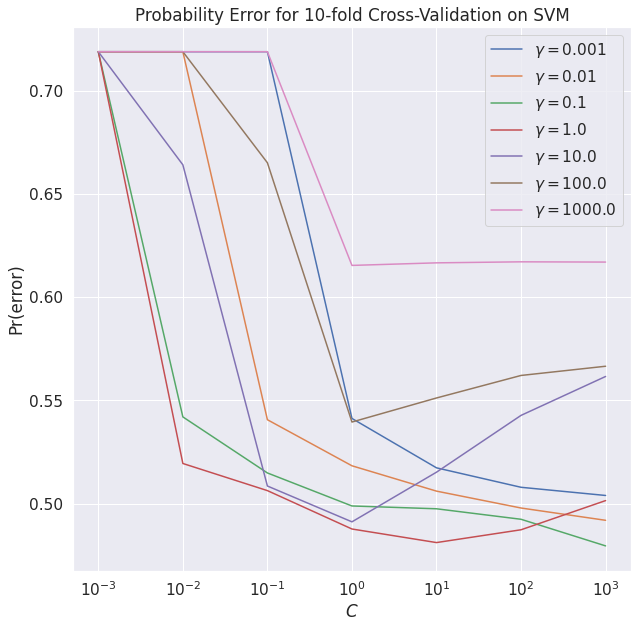

In [69]:
# Plot Pr(error) vs regularization parameter when gamma is held constant
C_data = classifier.cv_results_['param_C'].data
gamma_data = classifier.cv_results_['param_gamma'].data
cv_prob_error = 1 - classifier.cv_results_['mean_test_score']
plt.figure(figsize=(10, 10))
# Iterate over each gamma in the parameter grid
for g in gamma_range:
    # Find what C values correspond to a specific gamma
    C = C_data[gamma_data == g]
    # Sort in ascending order
    sort_idx = C.argsort()[::-1]
    # Pick out the error associated with that gamma and C combo
    prob_error = cv_prob_error[gamma_data == g]
    plt.plot(C[sort_idx], prob_error[sort_idx], label=fr"$\gamma = {g}$")

plt.title("Probability Error for 10-fold Cross-Validation on SVM")
plt.xscale('log')
plt.xlabel(r"$C$")
plt.ylabel("Pr(error)")
plt.legend()
plt.show()

In [80]:
classifier.best_params_

{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [70]:
#Check performance on train set
y_predict_train = classifier.predict(df_train_svm_X)
acc_train = accuracy_score(df_train_svm_y, y_predict_train)
print("Accuracy for SVM: ", acc_train)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(df_train_svm_y.values, y_predict_train, labels=[0,1,2,3])
print('\n\n-------The confusion matrix for this model is-------')
print(cm_train)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(df_train_svm_y.values, y_predict_train))

Accuracy for SVM:  0.5513138324243927


-------The confusion matrix for this model is-------
[[ 998  354  245  375]
 [ 450  637  552  219]
 [ 252  285 1161  272]
 [ 440  124   52 1652]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           0       0.47      0.51      0.49      1972
           1       0.46      0.34      0.39      1858
           2       0.58      0.59      0.58      1970
           3       0.66      0.73      0.69      2268

    accuracy                           0.55      8068
   macro avg       0.54      0.54      0.54      8068
weighted avg       0.54      0.55      0.55      8068



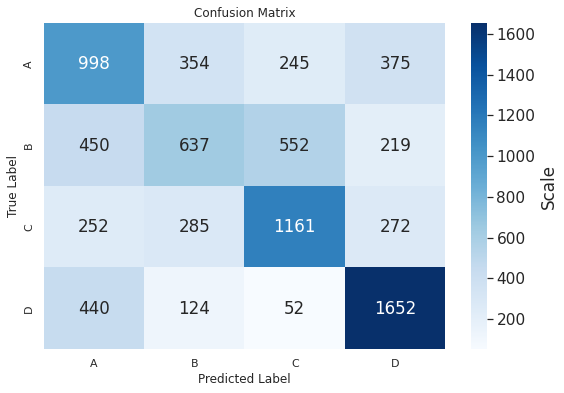

In [71]:
def plot_confusion_matrix(data, labels):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="Blues", cbar_kws={'label': 'Scale'}, fmt = 'd')
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.show()
 

labels = ['A', 'B', 'C', 'D']
plot_confusion_matrix(cm_train, labels)

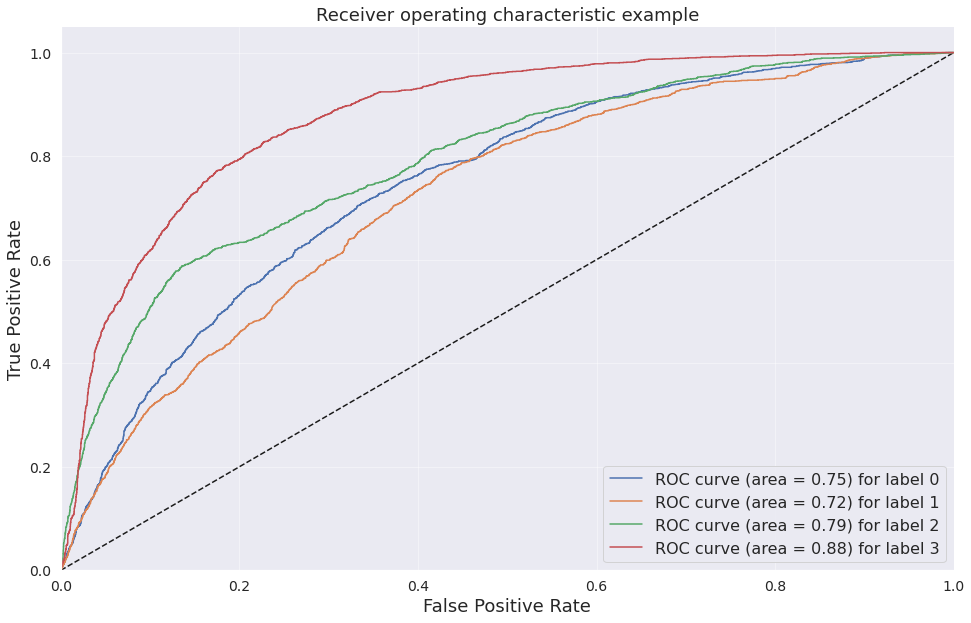

In [93]:
def plot_multiclass_roc(clf, X_test, y_test, classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(len(classes)):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

classes = {0:'A', 1:'B', 2:'C', 3:'D'}
plot_multiclass_roc(classifier, df_train_svm_X, df_train_svm_y, classes=classes, figsize=(16, 10))

RANDOM FOREST

In [72]:
df_train_rf_X = df_train.iloc[:, 1:-1]
df_train_rf_y = df_train.iloc[:,-1]

In [73]:
rfc=RandomForestClassifier(random_state=42)

In [74]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [75]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=cv, verbose = 5)
CV_rfc.fit(df_train_rf_X, df_train_rf_y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV 1/10] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.514 total time=   0.7s
[CV 2/10] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.543 total time=   0.7s
[CV 3/10] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.506 total time=   1.5s
[CV 4/10] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.515 total time=   0.7s
[CV 5/10] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.498 total time=   0.7s
[CV 6/10] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.503 total time=   0.7s
[CV 7/10] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.508 total time=   0.7s
[CV 8/10] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.542 total time=   0.7s
[CV 9/10] END criterion=gini, max_depth=4

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=5)

In [76]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [78]:
#Check performance on train set
y_predict_train = CV_rfc.predict(df_train_rf_X)
acc_train = accuracy_score(df_train_rf_y, y_predict_train)
print("Accuracy for SVM: ", acc_train)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(df_train_rf_y.values, y_predict_train, labels=[0,1,2,3])
print('\n\n-------The confusion matrix for this model is-------')
print(cm_train)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(df_train_rf_y.values, y_predict_train))

Accuracy for SVM:  0.6064700049578582


-------The confusion matrix for this model is-------
[[1137  277  221  337]
 [ 379  761  496  222]
 [ 201  285 1207  277]
 [ 340  101   39 1788]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           0       0.55      0.58      0.56      1972
           1       0.53      0.41      0.46      1858
           2       0.61      0.61      0.61      1970
           3       0.68      0.79      0.73      2268

    accuracy                           0.61      8068
   macro avg       0.60      0.60      0.59      8068
weighted avg       0.60      0.61      0.60      8068



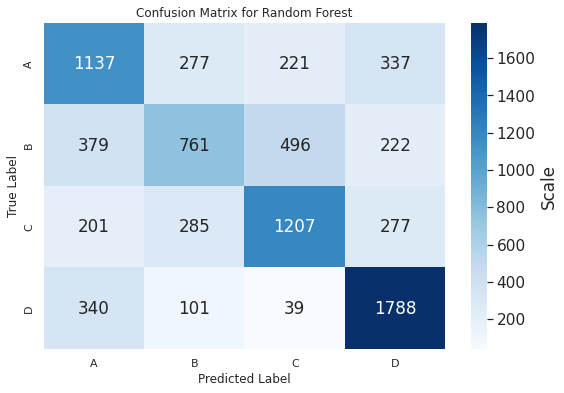

In [79]:
def plot_confusion_matrix(data, labels):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix for Random Forest")
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="Blues", cbar_kws={'label': 'Scale'}, fmt = 'd')
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.show()
 

labels = ['A', 'B', 'C', 'D']
plot_confusion_matrix(cm_train, labels)

#### **K-MEANS**

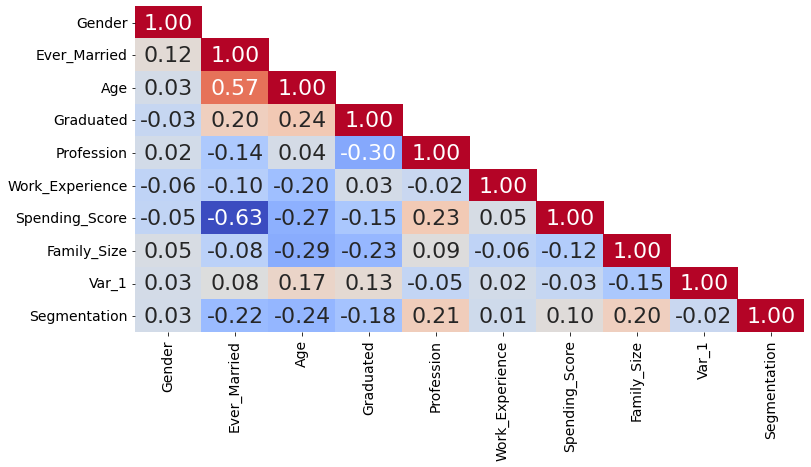

In [27]:
matrix = df_train.drop(columns=["ID"]).corr()
f, ax = plt.subplots(figsize=(12, 6))
with sns.axes_style("white"):
    sns.heatmap(matrix,mask=np.triu(matrix,1),annot=True,fmt=".2f", vmax=.8,cbar=False,cmap="coolwarm");

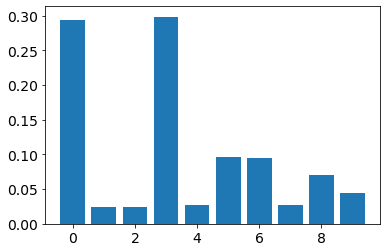

In [28]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [29]:
from sklearn.metrics import silhouette_score
sse_=[]
for i in range(2,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_train.drop(columns=["ID","Segmentation","Gender","Spending_Score"]))
    sse_.append( silhouette_score(df_train, kmeans.labels_))

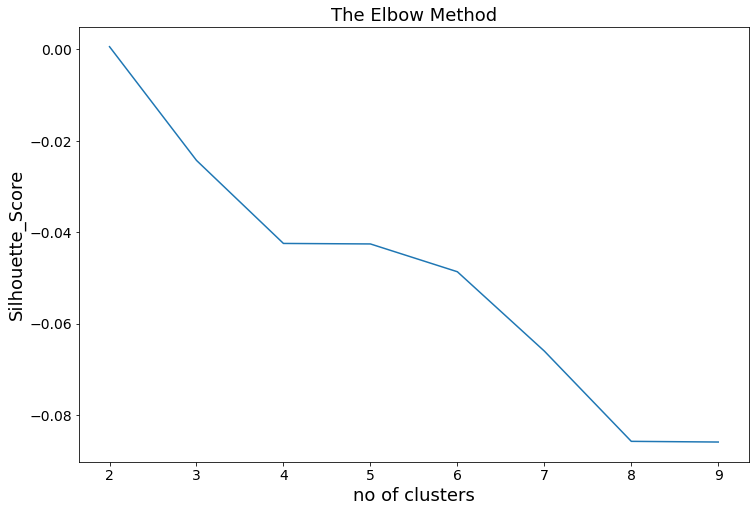

In [30]:
plt.figure(figsize=(12,8))
plt.plot(range(2,10), sse_)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Silhouette_Score')
plt.show()

In [31]:
kl = KneeLocator(range(2, 10), sse_, curve="convex", direction="decreasing")
kl.elbow

4

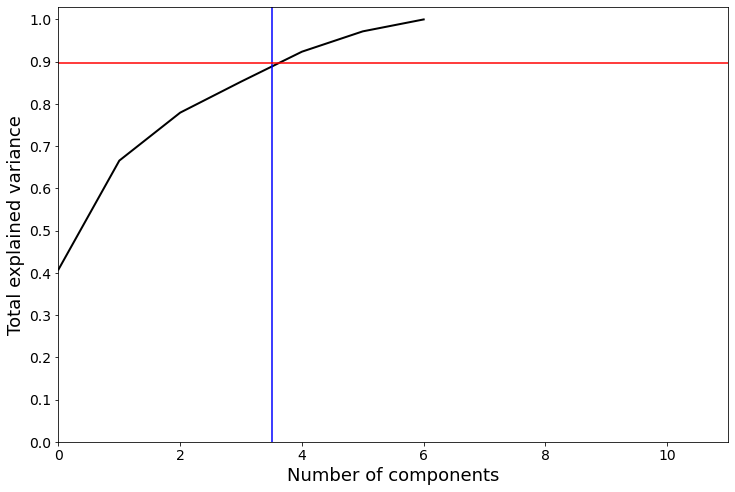

In [32]:
pca = PCA().fit(df_train.drop(columns=["ID","Segmentation","Gender","Spending_Score"]))

plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 11)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3.5, c='b')
plt.axhline(0.896, c='r')
plt.show();

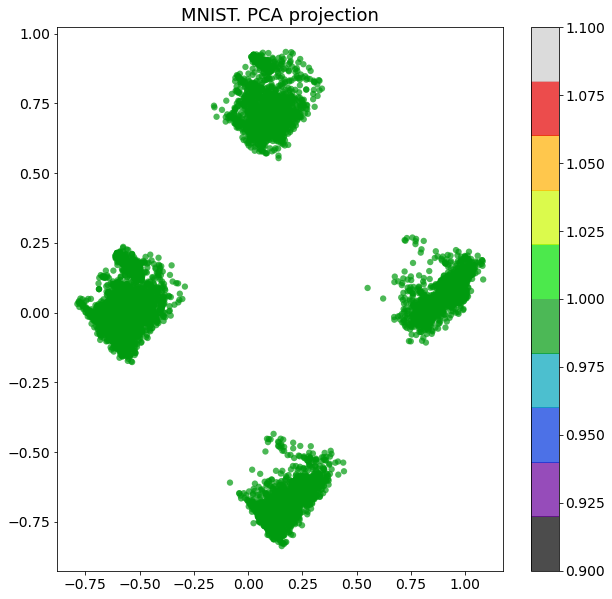

In [33]:
pca = decomposition.PCA(n_components=2)
X_reduced_train = pca.fit_transform(df_train.drop(columns=["ID","Segmentation","Gender","Spending_Score"]))

plt.figure(figsize=(10,10))
plt.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], c=[1]*df_train.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

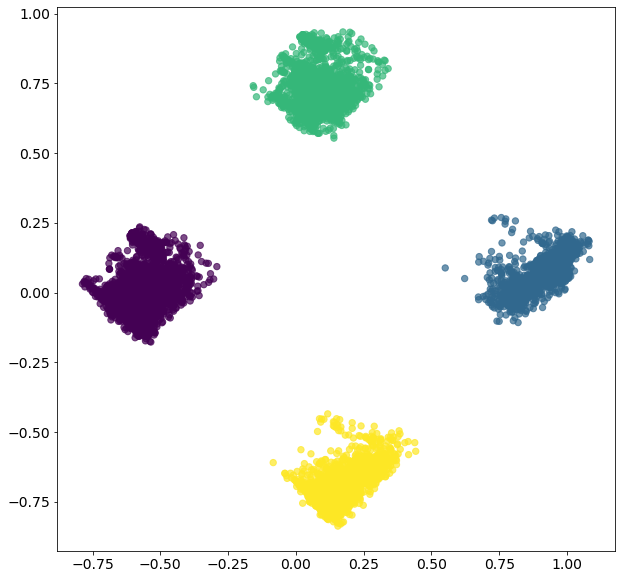

In [34]:
f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=0)
y_kmeans_train = kmeansmodel.fit_predict(X_reduced_train)

plt.scatter(X_reduced_train[:,0], X_reduced_train[:,1], c=y_kmeans_train, alpha=0.7, s=40)

In [35]:
df_test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

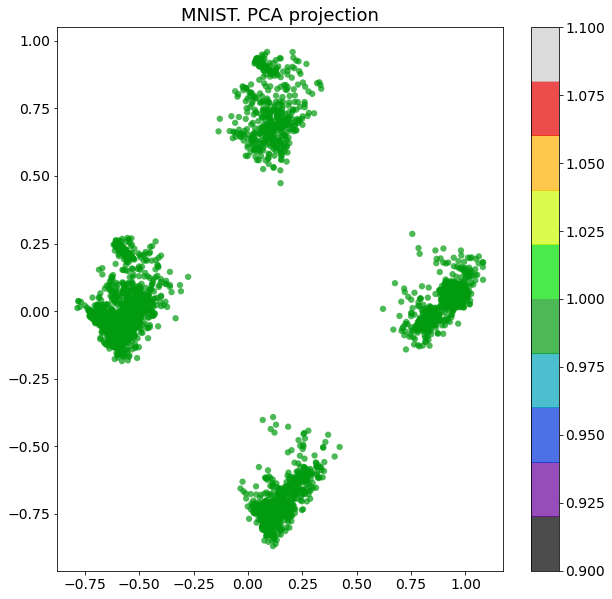

In [36]:
pca = decomposition.PCA(n_components=2)
X_reduced_test = pca.fit_transform(df_test.drop(columns=["ID","Gender","Spending_Score"]))

plt.figure(figsize=(10,10))
plt.scatter(X_reduced_test[:, 0], X_reduced_test[:, 1], c=[1]*df_test.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

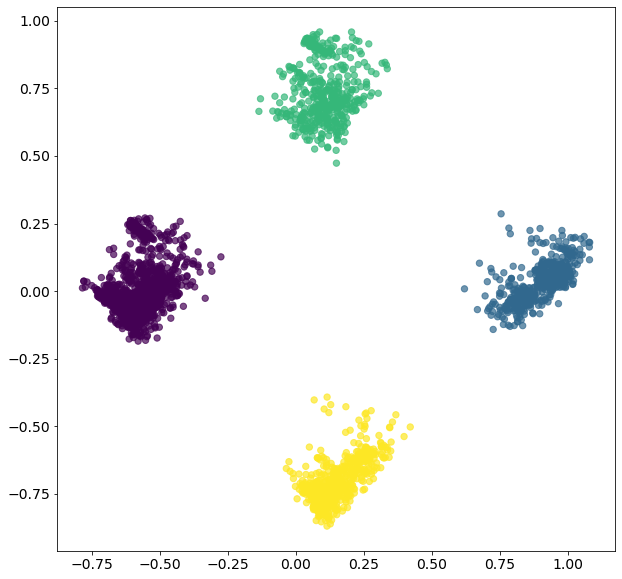

In [37]:
f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 4, init='k-means++',random_state=0)
y_kmeans_test = kmeansmodel.fit_predict(X_reduced_test)
    
plt.scatter(X_reduced_test[:,0], X_reduced_test[:,1], c=y_kmeans_test, alpha=0.7, s=40)

In [38]:
df_test=df_test.reset_index()
df_kmeans = pd.DataFrame(y_kmeans_test)
df_kmeans.columns = ["k-means_label"]

df_test=pd.concat([df_test,df_kmeans],axis=1)
df_test

,index,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,k-means_label
0,0,458989,0.0,1.0,0.253521,1.0,0.250,0.000000,1.0,0.000,0.833333,0
1,1,458994,1.0,1.0,0.267606,1.0,0.625,0.571429,0.0,0.375,0.833333,0
2,2,458996,0.0,1.0,0.718310,0.0,0.125,0.000000,1.0,0.000,0.833333,2
3,3,459000,1.0,1.0,0.577465,0.0,0.500,0.785714,0.5,0.125,0.833333,2
4,4,459001,0.0,0.0,0.014085,0.0,1.000,0.142857,1.0,0.375,0.833333,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2622,2622,467954,1.0,0.0,0.154930,0.0,0.625,0.642857,1.0,0.375,0.833333,1
2623,2623,467958,0.0,0.0,0.239437,1.0,0.125,0.071429,1.0,0.000,0.833333,3
2624,2624,467960,0.0,0.0,0.492958,1.0,0.375,0.071429,1.0,0.125,0.833333,3
2625,2625,467961,1.0,1.0,0.408451,1.0,0.500,0.071429,0.5,0.500,0.500000,0


In [39]:
df_train=df_train.reset_index()
df_kmeans = pd.DataFrame(y_kmeans_train)
df_kmeans.columns = ["k-means_label"]

df_train=pd.concat([df_train,df_kmeans],axis=1)
df_train

,index,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,k-means_label
0,0,462809,1.0,0.0,0.056338,0.0,0.625,0.071429,1.0,0.375,0.500000,3,1
1,1,462643,0.0,1.0,0.281690,1.0,0.250,0.357143,0.0,0.250,0.500000,0,0
2,2,466315,0.0,1.0,0.690141,1.0,0.250,0.071429,1.0,0.000,0.833333,1,0
3,3,461735,1.0,1.0,0.690141,1.0,0.875,0.000000,0.5,0.125,0.833333,1,0
4,4,462669,0.0,1.0,0.309859,1.0,0.375,0.357143,0.5,0.625,0.833333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,8063,464018,1.0,0.0,0.056338,0.0,0.750,0.000000,1.0,0.750,0.000000,3,1
8064,8064,464685,1.0,0.0,0.239437,0.0,0.500,0.214286,1.0,0.375,0.500000,3,1
8065,8065,465406,0.0,0.0,0.211268,1.0,0.625,0.071429,1.0,0.000,0.833333,3,3
8066,8066,467299,0.0,0.0,0.126761,1.0,0.625,0.071429,1.0,0.375,0.833333,1,3


In [40]:
#df_train['k-means_label'] = df_train['k-means_label'].astype(float)
acc = accuracy_score(df_train.Segmentation, df_train['k-means_label'])
print(acc)

0.18839861179970252


In [41]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
conf_mat = confusion_matrix(df_train.Segmentation, df_train['k-means_label'] )
conf_mat

array([[ 668,  254,  489,  561],
       [ 986,  128,  383,  361],
       [1372,  161,  191,  246],
       [ 285, 1111,  339,  533]])

In [42]:
df_kmeans.head()

,k-means_label
0,1
1,0
2,0
3,0
4,0


In [43]:
from scipy.optimize import linear_sum_assignment

true_indices, pred_indices = linear_sum_assignment(-conf_mat)
# Re-assign cluster labels afterwards
cluster_labels = np.empty(len(df_kmeans))
for k in range(4):
    # Wherever the GMM assignment was k, re-assign to its best-performing label
    cluster_labels[y_kmeans_train  == pred_indices[k]] = true_indices[k]


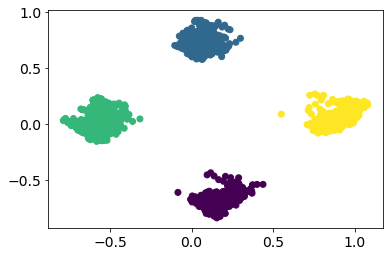

In [44]:
correct_preds = (cluster_labels == df_train.Segmentation)
plt.scatter(X_reduced_train[correct_preds, 0], X_reduced_train[correct_preds, 1], c=cluster_labels[correct_preds])
#plt.scatter(X_reduced_train[~correct_preds, 0], X_reduced_train[~correct_preds, 1], color='r', label="Incorrect Cluster Assignments")

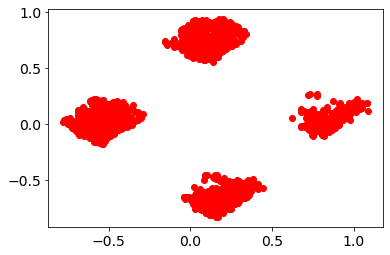

In [45]:
plt.scatter(X_reduced_train[~correct_preds, 0], X_reduced_train[~correct_preds, 1], color='r', label="Incorrect Cluster Assignments")
